<a href="https://colab.research.google.com/github/DarshakVasoya/Machine-Learning/blob/main/EDA_Report_for_Coursera.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# EDA report for Housing Datase

In [ ]:
pip install pandas numpy seaborn matplotlib scikit-learn scipy skillsnetwork

In [ ]:
import skillsnetwork
import pandas as pd
import numpy as np

In [ ]:
# Brief description of the data set and a summary of its attributes


In [ ]:
URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0232EN-SkillsNetwork/asset/Ames_Housing_Data1.tsv'
await skillsnetwork.download(URL)
housing =pd.read_csv('Ames_Housing_Data1.tsv', sep='\t')


Saved as 'Ames_Housing_Data1.tsv'


In [ ]:
housing.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
2,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
3,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
4,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000


In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2931 entries, 0 to 2930
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2931 non-null   int64  
 1   PID              2931 non-null   int64  
 2   MS SubClass      2931 non-null   int64  
 3   MS Zoning        2931 non-null   object 
 4   Lot Frontage     2441 non-null   float64
 5   Lot Area         2931 non-null   int64  
 6   Street           2931 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2931 non-null   object 
 9   Land Contour     2931 non-null   object 
 10  Utilities        2931 non-null   object 
 11  Lot Config       2931 non-null   object 
 12  Land Slope       2931 non-null   object 
 13  Neighborhood     2931 non-null   object 
 14  Condition 1      2931 non-null   object 
 15  Condition 2      2931 non-null   object 
 16  Bldg Type        2931 non-null   object 
 17  House Style   

In [ ]:

# Initial plan for data exploration

# Actions taken for data cleaning and feature engineering

# Key Findings and Insights, which synthesizes the results of Exploratory Data Analysis in an insightful and actionable manner

# Formulating at least 3 hypothesis about this data

# Conducting a formal significance test for one of the hypotheses and discuss the results

# Suggestions for next steps in analyzing this data

# A paragraph that summarizes the quality of this data set and a request for additional data if needed

In [ ]:
print("description for sale price :" )
print( housing.SalePrice.describe())

print(" \nCategorical variable :sale condition" )

print(housing['Sale Condition'].value_counts())

description for sale price :
count      2931.000000
mean     180807.729785
std       79875.557267
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64
 
Categorical variable :sale condition
Normal     2414
Partial     245
Abnorml     190
Family       46
Alloca       24
AdjLand      12
Name: Sale Condition, dtype: int64


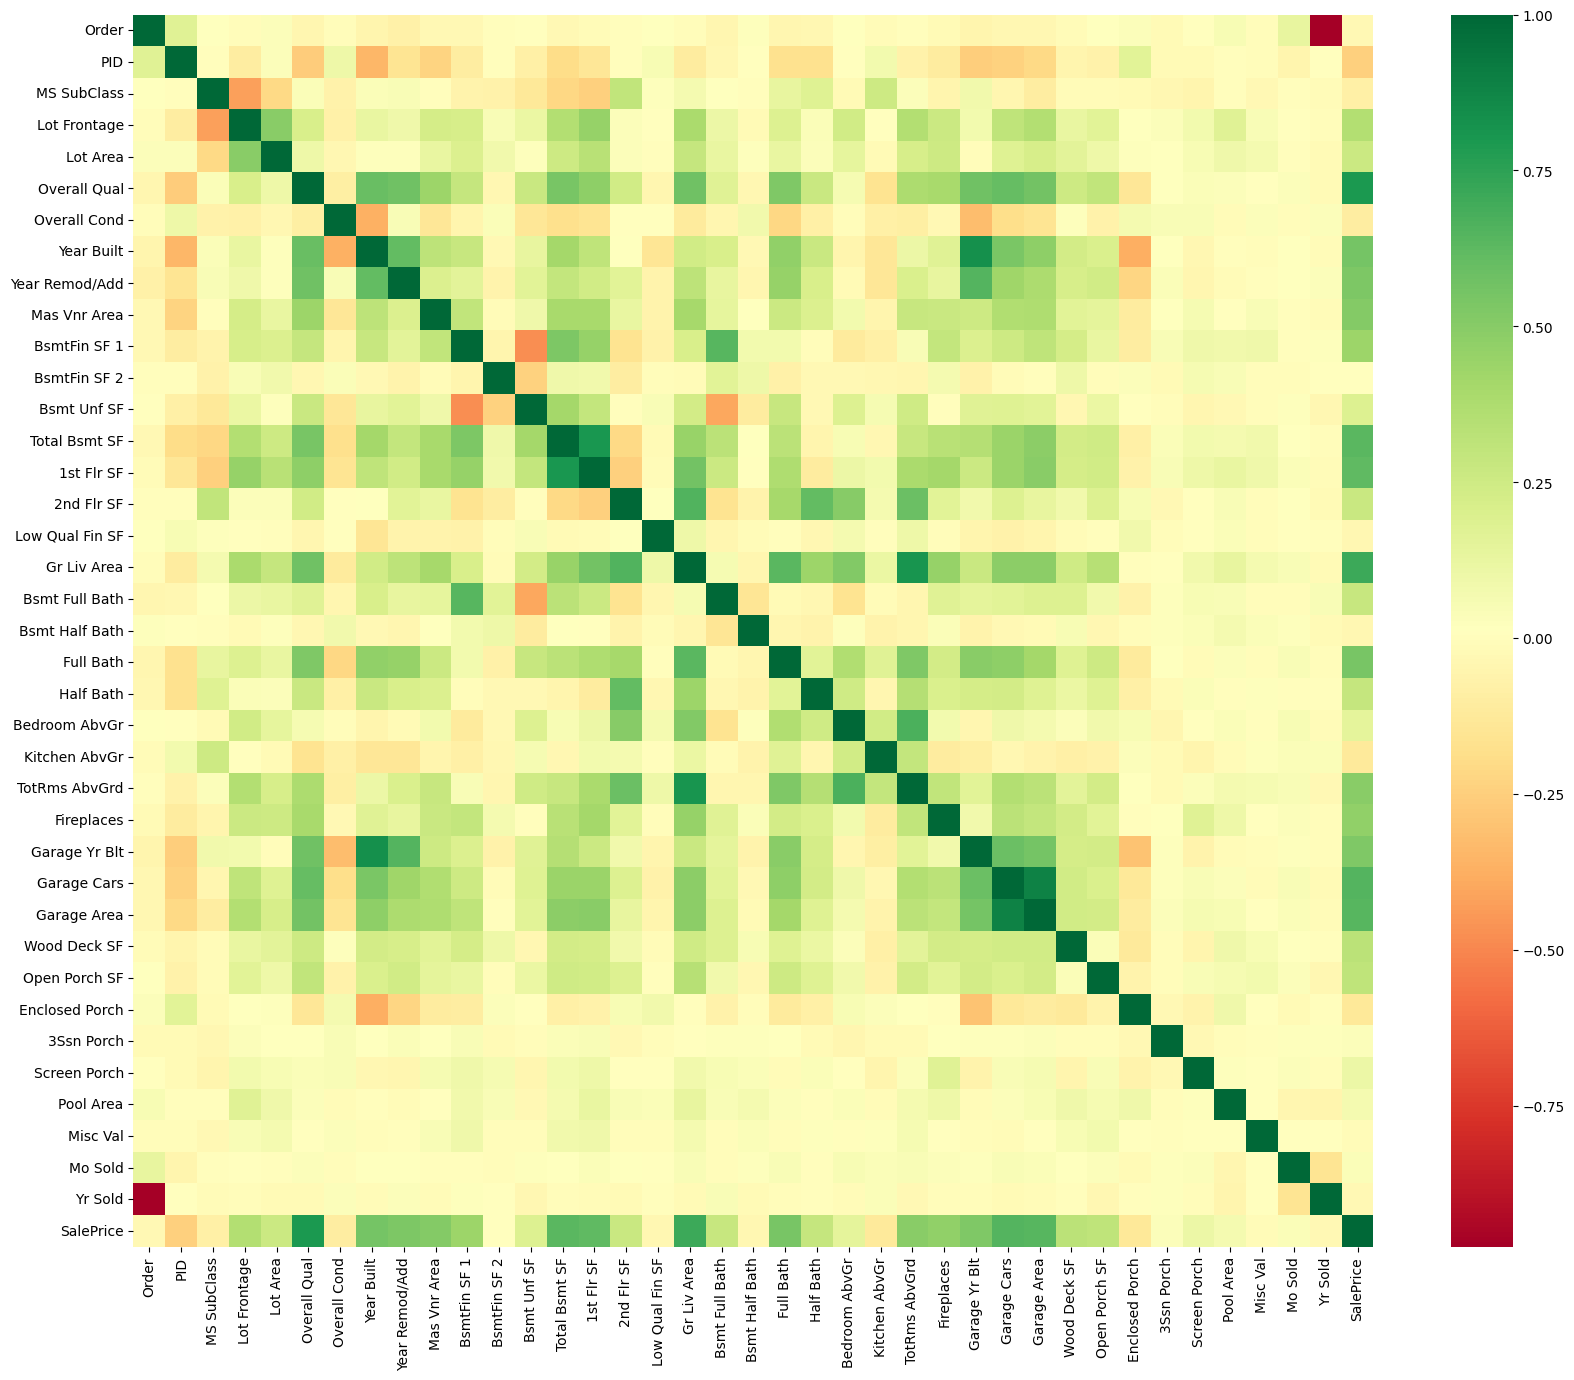

In [ ]:
import seaborn as sns

import matplotlib.pyplot as plt
# Let's see how numerical type features are corelated with eachother..
housing_number_type_features=housing.select_dtypes(include=['float64','int64'])
housing_number_type_features_correlation= housing_number_type_features.corr()
# print(housing_number_type_features_correlation)
plt.figure(figsize=(20,16))
sns.heatmap(housing_number_type_features_correlation,annot=False,cmap='RdYlGn')
plt.show()
# housing_number_type_features_correlation[abs(housing_number_type_features_correlation) >0.5]

In [ ]:
# suppose our target variable is Saleprice
# Let's see how other variables are correlated with salesprice


housing_number_type_features_correlation_SalesPrice=housing_number_type_features_correlation['SalePrice'][:]
top_features_corr_SalePrice=housing_number_type_features_correlation_SalesPrice[abs(housing_number_type_features_correlation_SalesPrice)>0.5]
top_features_corr_SalePrice.index.tolist()


['Overall Qual',
 'Year Built',
 'Year Remod/Add',
 'Mas Vnr Area',
 'Total Bsmt SF',
 '1st Flr SF',
 'Gr Liv Area',
 'Full Bath',
 'Garage Yr Blt',
 'Garage Cars',
 'Garage Area',
 'SalePrice']

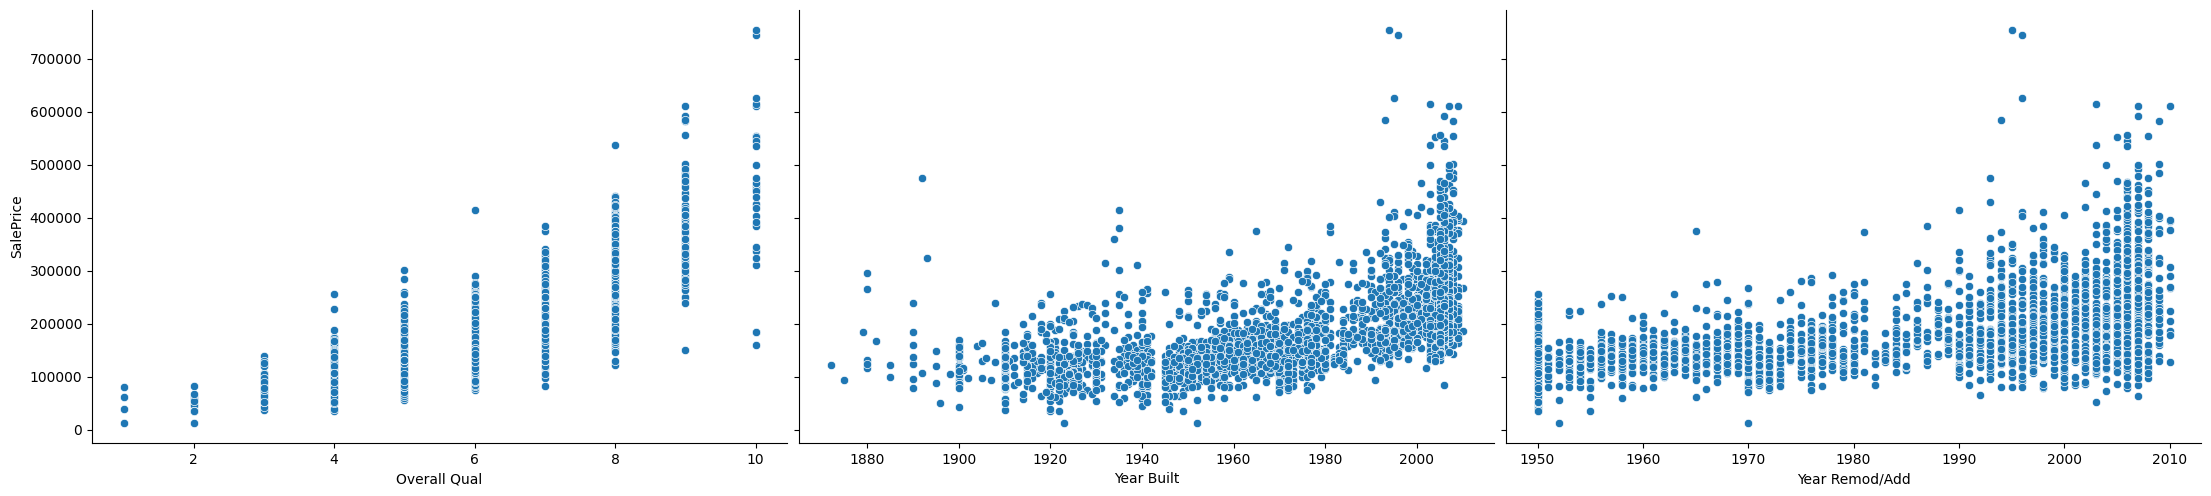

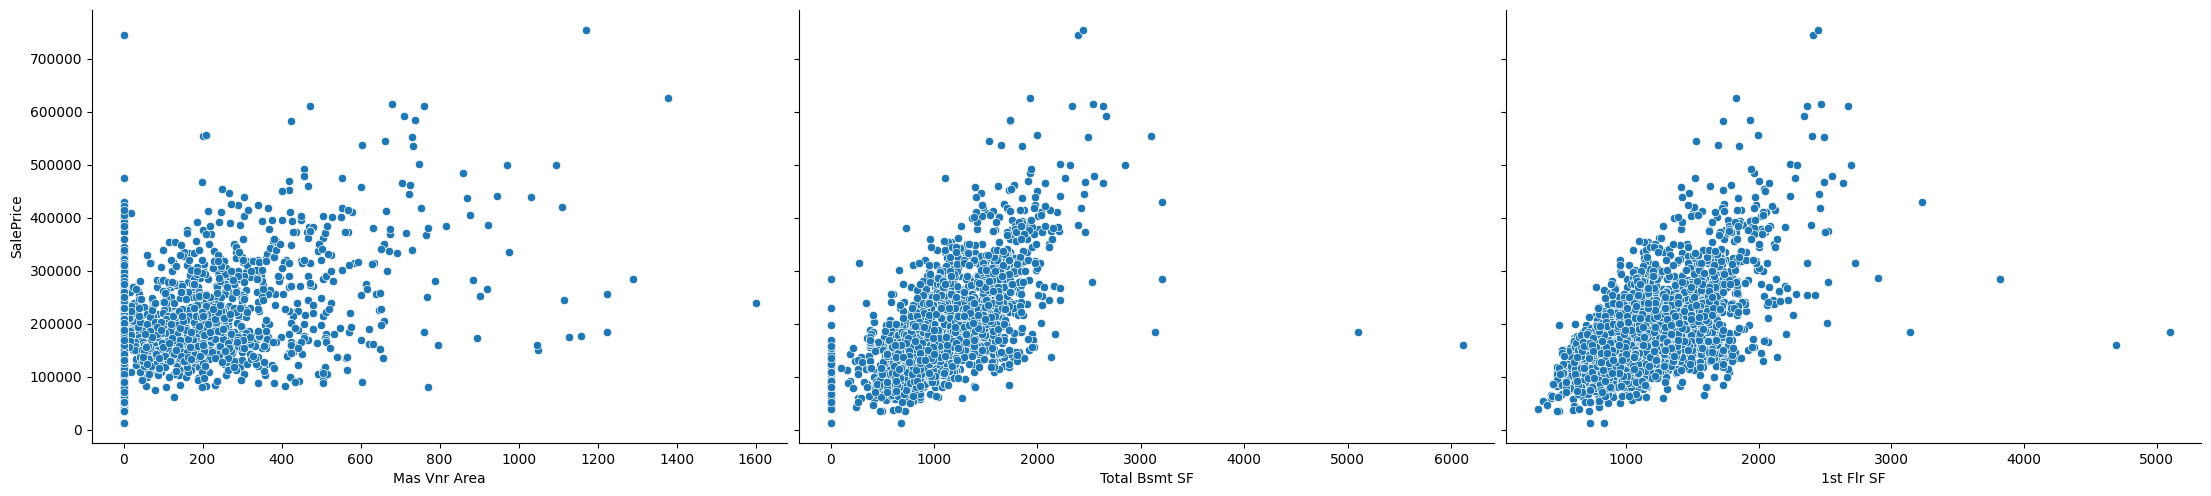

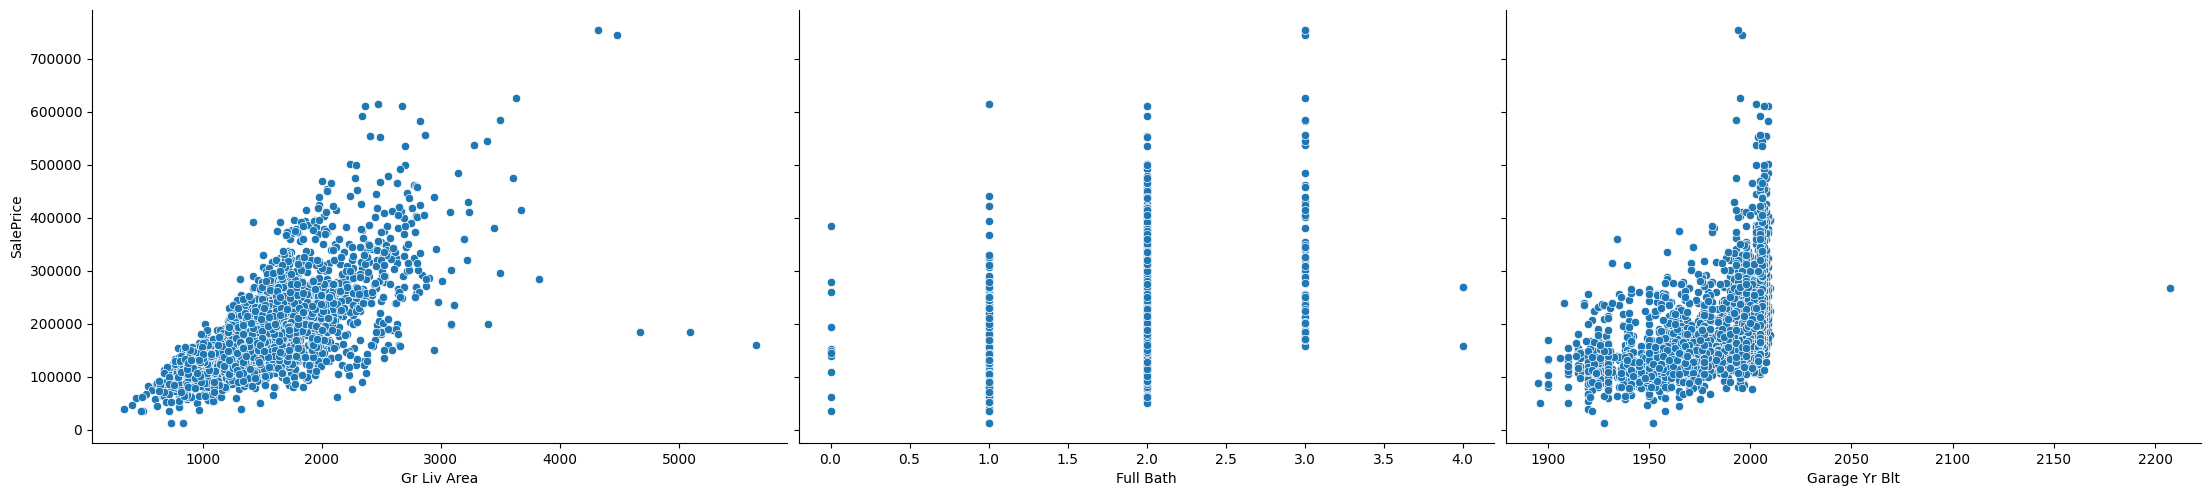

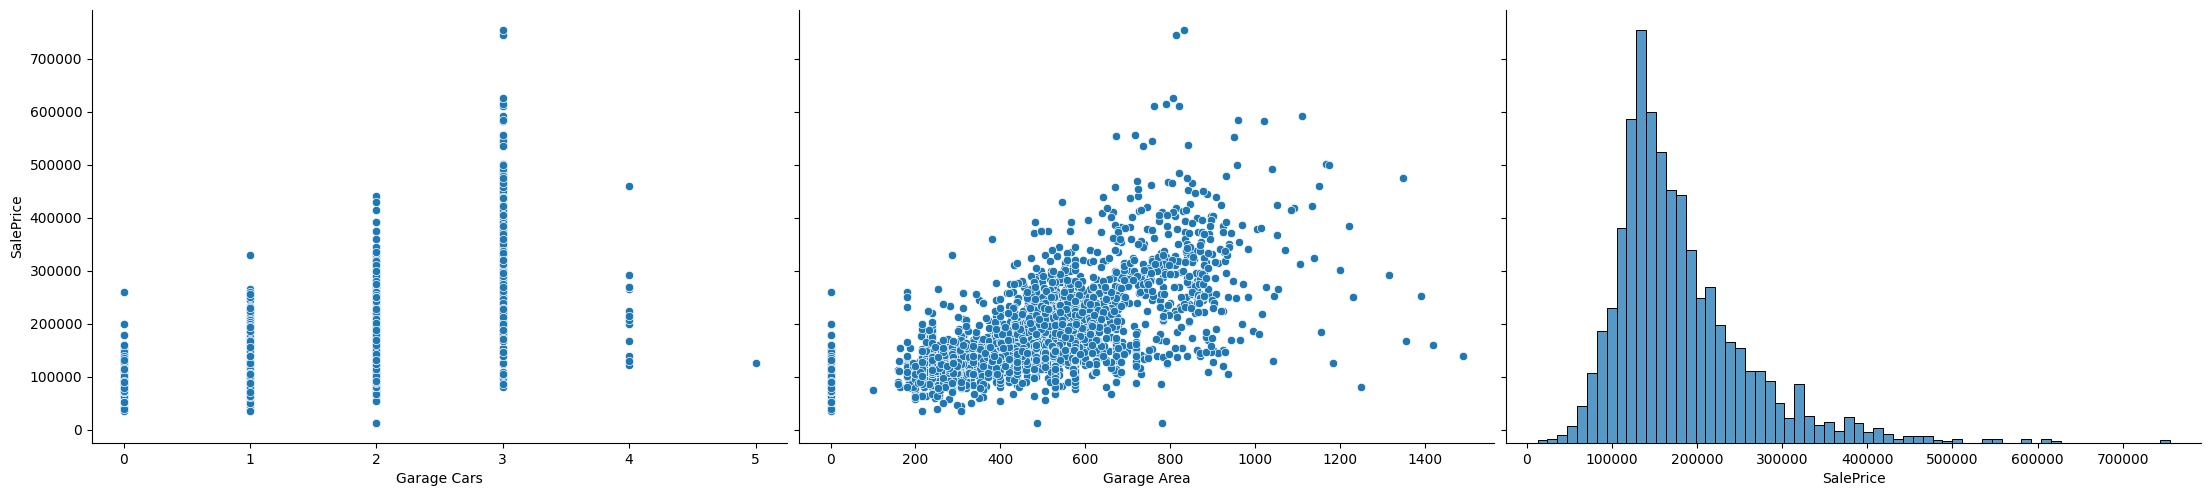

In [ ]:
# how other variabls are correlated with saleprice
for i in range(0,len(top_features_corr_SalePrice.index.tolist()),3):
  sns.pairplot(data=housing,x_vars=top_features_corr_SalePrice.index.tolist()[i:i+3],y_vars ='SalePrice', height=5,aspect=1.5)


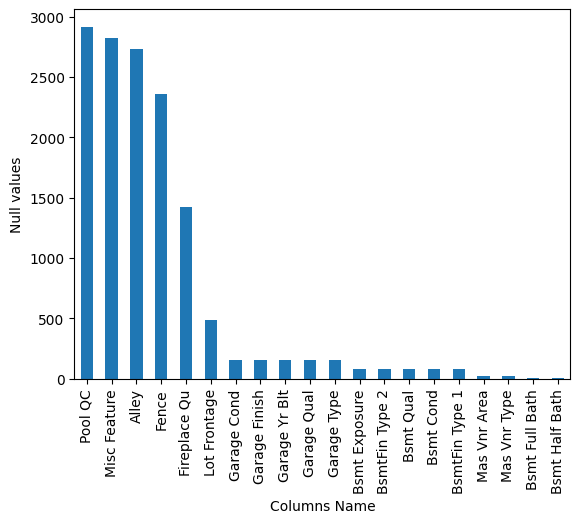

In [ ]:
# removing duplicate date
housing_cleaning=housing.copy().drop_duplicates()
# Handling missing value
total_null_value=housing_cleaning.isnull().sum().sort_values(ascending=False)

total_null_value.head(20).plot(kind='bar')
plt.xlabel('Columns Name')
plt.ylabel('Null values')
plt.show()


# # housing_cleaning.dropna(subset=["Pool QC"])
housing_cleaning.head()
# replacing missing value with median
median_Lot_Frontage = housing_cleaning["Lot Frontage"].median()

# sns.kdeplot(housing_cleaning["Lot Frontage"],color='skyblue', fill=True)
# plt.title('Distribution of Lot Frontage')
# plt.xlabel('Values')
# plt.ylabel('Density')
# plt.show()

housing_cleaning["Lot Frontage"]=housing_cleaning["Lot Frontage"].fillna(median_Lot_Frontage)

# Handling the Outliers

# sns.boxplot(x=housing_cleaning['SalePrice'])
plt.show()
housing_cleaning.drop( housing_cleaning[ housing_cleaning['SalePrice'] > 320000].index,inplace= True )


# sns.boxplot(x=housing_cleaning['SalePrice'])




In [ ]:
# finding categorical variable
housing_categorical_type_features=housing_cleaning.select_dtypes(include=['object']).columns.tolist()
housing_categorical_type_features

['MS Zoning',
 'Street',
 'Alley',
 'Lot Shape',
 'Land Contour',
 'Utilities',
 'Lot Config',
 'Land Slope',
 'Neighborhood',
 'Condition 1',
 'Condition 2',
 'Bldg Type',
 'House Style',
 'Roof Style',
 'Roof Matl',
 'Exterior 1st',
 'Exterior 2nd',
 'Mas Vnr Type',
 'Exter Qual',
 'Exter Cond',
 'Foundation',
 'Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin Type 2',
 'Heating',
 'Heating QC',
 'Central Air',
 'Electrical',
 'Kitchen Qual',
 'Functional',
 'Fireplace Qu',
 'Garage Type',
 'Garage Finish',
 'Garage Qual',
 'Garage Cond',
 'Paved Drive',
 'Pool QC',
 'Fence',
 'Misc Feature',
 'Sale Type',
 'Sale Condition']

In [ ]:
# Converting categorical variables into dummies
housing_cleaning=pd.get_dummies(housing_cleaning,columns=housing_categorical_type_features,drop_first=True)
housing_cleaning

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,1,526301100,20,141.0,31770,6,5,1960,1960,112.0,...,0,0,0,0,1,0,0,0,1,0
2,2,526350040,20,80.0,11622,5,6,1961,1961,0.0,...,0,0,0,0,1,0,0,0,1,0
3,3,526351010,20,81.0,14267,6,6,1958,1958,108.0,...,0,0,0,0,1,0,0,0,1,0
4,4,526353030,20,93.0,11160,7,5,1968,1968,0.0,...,0,0,0,0,1,0,0,0,1,0
5,5,527105010,60,74.0,13830,5,5,1997,1998,0.0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2926,2926,923275080,80,37.0,7937,6,6,1984,1984,0.0,...,0,0,0,0,1,0,0,0,1,0
2927,2927,923276100,20,68.0,8885,5,5,1983,1983,0.0,...,0,0,0,0,1,0,0,0,1,0
2928,2928,923400125,85,62.0,10441,5,5,1992,1992,0.0,...,0,0,0,0,1,0,0,0,1,0
2929,2929,924100070,20,77.0,10010,5,5,1974,1975,0.0,...,0,0,0,0,1,0,0,0,1,0


In [ ]:
housing_cleaning.head().T

housing_cleaning.drop(['PID',"Order"],axis=1,inplace=True)

In [ ]:
# Log transforming skew variables
housing_number_type_features_list=housing_number_type_features.columns.tolist()
housing_number_type_features_list.remove('Order')
housing_number_type_features_list.remove('PID')

skew_limit = 0.75 # define a limit above which we will log transform
skew_vals = housing_cleaning[ housing_number_type_features_list ].skew()


# skew function give us skewness of that column
col_more_skew=skew_vals[abs(skew_vals.values) > skew_limit]





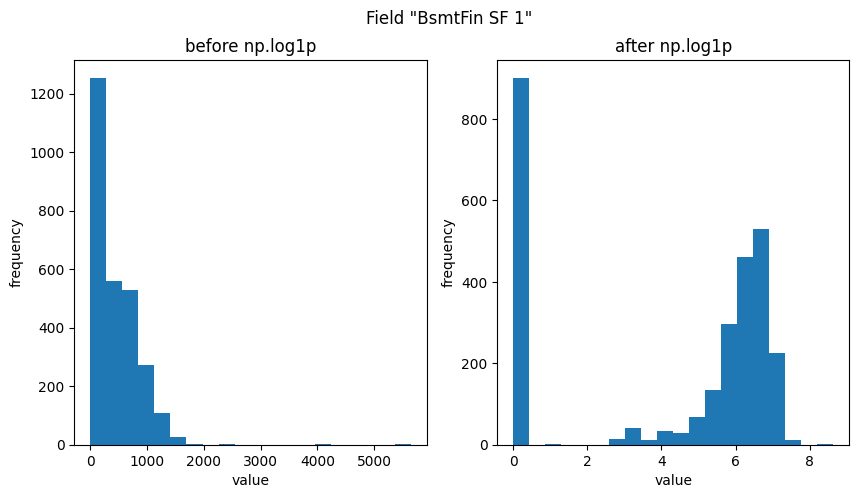

In [ ]:
# Let's look at what happens to one of these features, when we apply np.log1p visually.

# Choose a field
field = "BsmtFin SF 1"

fig,axes=plt.subplots(1,2,figsize=(10,5))
# make sure when you have more than on raw, axes will be two dimentional array
axes[0].hist(housing_cleaning[field], bins=20)

axes[1].hist(housing_cleaning[field].apply(np.log1p),bins=20)
# The apply() function in pandas is used to apply a function along a specific axis of a DataFrame or Series. It applies the given function to each element or row/column of the DataFrame or Series and returns the result.
# DataFrame.apply(func, axis=0, ...)
# Series.apply(func, ...)

# Formatting of titles etc. for each subplot
axes[0].set(title='before np.log1p', ylabel='frequency', xlabel='value')
axes[1].set(title='after np.log1p', ylabel='frequency', xlabel='value')
fig.suptitle('Field "{}"'.format(field));

In [ ]:
# Perform the skew transformation:

for colm in col_more_skew.index.tolist():
  housing_cleaning[colm]=housing_cleaning[colm].apply(np.log1p)


In [ ]:
#  Three hypotheses

from scipy.stats import ttest_ind


# Null Hypothesis (H0): The mean sale prices of houses with a garage are equal to the mean sale prices of houses without a garage.

# Alternative Hypothesis (H1): The mean sale prices of houses with a garage are not equal to the mean sale prices of houses without a garage.


houses_with_garage=housing_cleaning[housing_cleaning["Garage Area"] > 0]
houses_without_garage=housing_cleaning[housing_cleaning["Garage Area"] == 0]
# Perform a t-test
t_stat, p_value = ttest_ind(houses_with_garage['SalePrice'], houses_without_garage['SalePrice'], equal_var=False)

# Display the results
print(f'T-Statistic: {t_stat}')
print(f'P-Value: {p_value}')
print("here p value is less than significant value, so we are rejecting null hypothesis")

#  The t-statistic is a measure of the difference between the means of two groups relative to the variability within the groups.
#  You can interpret the t-statistic in the context of the hypothesis test and use it to determine whether there is a significant difference between the sale prices of houses with and without a garage.

T-Statistic: 22.500369343146456
P-Value: 8.502481661331864e-58
here p value is less than significant value, so we are rejecting null hypothesis


In [ ]:
# Hypothesis: There is a significant association between the house style and the presence of a garage.

# Null Hypothesis (H0): The distribution of house styles is independent on the presence of a garage.

# Alternative Hypothesis (H1): The distribution of house styles is associated with the presence of a garage.


from scipy.stats import chi2_contingency

# Create a new categorical variable 'GaragePresence' indicating whether a house has a garage or not
GaragePresence=housing_cleaning['Garage Area'].apply(lambda x: 'With Garage' if x > 0 else 'Without Garage')

# Create a contingency table between 'HouseStyle' and 'GaragePresence'
contingency_table = pd.crosstab(housing['House Style'], GaragePresence)

# Perform chi-square test
chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)

# Display the results
print(f'Chi-Square Statistic: {chi2_stat}')
print(f'P-Value: {p_value}')
print("Here p value is less than 0.05, so we will reject null hypothesis")

Chi-Square Statistic: 51.32719768881161
P-Value: 7.921714887486107e-09
Here p value is less than 0.05, so we will reject null hypothesis


In [ ]:
# Hypothesis: There is a significant association between the Saleprice and Low Qual Fin SF.

# Null Hypothesis (H0): The Saleprice of house is dependent on the Low Qual Fin SF  .

# Alternative Hypothesis (H1):The Saleprice of house is dependent on the Low Qual Fin SF of the house.


from scipy.stats import chi2_contingency

# Discretize SalePrice into categories (you can adjust the bins based on your criteria)
SalePriceCategory = pd.qcut(housing_cleaning['SalePrice'], q=[0, 0.5, 1], labels=['Low', 'High'])



contingency_table = pd.crosstab(housing['Low Qual Fin SF'], SalePriceCategory)

# Perform chi-square test
chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)

# Display the results
print(f'Chi-Square Statistic: {chi2_stat}')
print(f'P-Value: {p_value}')

print("Here, we accept null hypothesis.")

Chi-Square Statistic: 39.093421159520574
P-Value: 0.25166325236016723
Here, we accept null hypothesis.
